In [5]:
from fractions import Fraction
import numpy as np
import math
import matplotlib.pyplot as plt
from math import gcd

In [6]:
##define sylvesters sequence by recurrence relation:
def sylv(n):
    if(n == 0):
        return 2
    else:
        k = sylv(n-1)
        return k*k - k + 1

In [7]:
def sylv_set(n):
    if n == 1:
        print('undefined')
    output = [1]
    for i in range(0, n-2):
        output.append(-1 * sylv(i))
    output.append(-1 * (sylv(n-2)) + 1)
    return output

In [8]:
#some particularly interesting sets:


#L = [1,-2,-3, -5, 30]                       #upper bound of 1.10555042
#L = sylv_set(3)
#L = sylv_set(4) 
#L = sylv_set(5)
#L = sylv_set(6)                            #upper bound of 1.08298647
#L = sylv_set(7)
#L = [1, -2, -3, -7, -47, -395, -779730]    #upper bound of 1.08783809
#L = [1, -2, -3, -11, -23, -31, -47058]
#L = [1, -2, -3, -5, 6, 10, -11, -19, -36, -45, -57, -76, -110]             #on A. walker's blog
L = [1, -2, -3, -5, 6, -7, 10, -11, -13, 14, 15, -17, -455, 595, -715]     #on A. walker's blog
L

[1, -2, -3, -5, 6, -7, 10, -11, -13, 14, 15, -17, -455, 595, -715]

In [9]:
#check if L is balanced:
sum = 0
for i in range(0, len(L)):
    sum += Fraction(1,L[i])
if sum != 0:
    print("Multiset is not balanced")
    
##lcm
def lcm(L):  
    lcm = math.fabs(L[0])
    for i in L[1:]:
          lcm = lcm*i/gcd(int(lcm), i)
    return int(math.fabs(lcm))

In [10]:
def chi(t, L):
    sum = 0
    for i in range(0, len(L)):
        floor = math.floor(t/math.fabs(L[i]))
        sum = sum +  (np.sign(L[i]) * floor)
    return sum

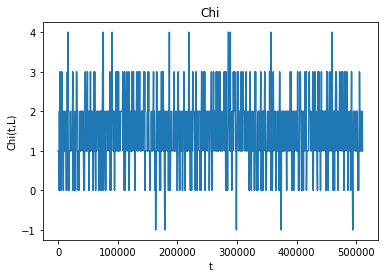

In [11]:
steps = 1000
t = np.linspace(1, lcm(L)+1, steps)
plot = []
for i in range(0,steps):
    plot.append(chi(t[i], L))
    
plt.plot(t, plot)
plt.title('Chi');
plt.xlabel('t');
plt.ylabel('Chi(t,L)');

In [12]:
##find min and max of chi on L for t > 0
current_min = chi(1,L)
current_max = chi(1,L)
for i in range(1, lcm(L)+1):
    if chi(i, L) < current_min:
        current_min = chi(i,L)
        i_min = i
    if chi(i, L) > current_max:
        current_max = chi(i,L)
        i_max = i
m = current_min
M = current_max

In [13]:
m

-2

In [14]:
M

5

In [15]:
##create set of j's
J_1=[]
for i in range(0, int(math.fabs(m)) + 1):
    J_1.append(i)
if J_1 == []:
    J_1 = [0]

J_2 = []
for i in range(0, M + 1):
    J_2.append(i)
if J_2 == []:
    J_2 = [0]

In [16]:
J_1

[0, 1, 2]

In [17]:
J_2

[0, 1, 2, 3, 4, 5]

In [18]:
n_j = []
for j in range(0, len(J_1)):
    n_j.append(0)
rho_j = []
for j in range(0, len(J_2)):
    rho_j.append(0)

In [19]:
for j in range(0, len(J_1)):

    for i in range(1,lcm(L)+1):
        if chi(i,L) <= -1 * j:
            n_j[j] = i
            break
    
for j in range(0, len(J_2)):
    temp = []
    for i in range(1,lcm(L)+1):
        if chi(i,L) >= j:
            rho_j[j] = i
            break

In [20]:
##for sylv_set, appears to always be the abs value of largest element of set
n_j 

[22, 936, 2278]

In [21]:
rho_j

[1, 1, 19, 31, 271, 4861]

In [22]:
##define h
h = 0
for i in range(0, len(n_j)):
    h += 1 / (n_j[i])

In [23]:
H = 0
for i in range(1, len(rho_j)):
    H += 1 / (rho_j[i])

In [24]:
def alpha(L):
    sum = 0
    for i in range(0, len(L)):
        sum += (math.log(math.fabs(L[i])) / L[i])
    return sum * -1

In [25]:
##upperbound
if h >= 1:
    print("h does not meet requirements")
alpha(L) / (1-h)

1.0582856940189593

In [26]:
##lowerbound
if rho_j[1] != 1:
    print("rho does not meet requirements")
alpha(L) / H

0.926341025899119

In [27]:
##upper bound seems to converge to 1.08238 for large sylv_sets, assuming assumptions above are correct

In [28]:
##assuming some of the assumptions we made about how sylv_Set behaves above, we can make the following claim:
##the upper bound for any sylv_set takes the form:
## 1 / (1 - |last element in set|) * sum over all elements of (log(l)) / l

def attempt(L):
    last_element = math.fabs(L[-1])
    h = 1 / last_element
    fraction = 1 / (1-h)
    return fraction * alpha(L)

In [29]:
attempt(sylv_set(8))

1.0823894232186946

In [30]:
attempt(sylv_set(10))

1.0823894232185929

In [31]:
attempt(sylv_set(12))

1.0823894232185929